In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snp
%matplotlib inline

In [2]:
wholesale_data = pd.read_csv('Wholesale customers data.csv')

In [3]:
wholesale_data.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
wholesale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
wholesale_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [6]:
# finding missing values
wholesale_data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

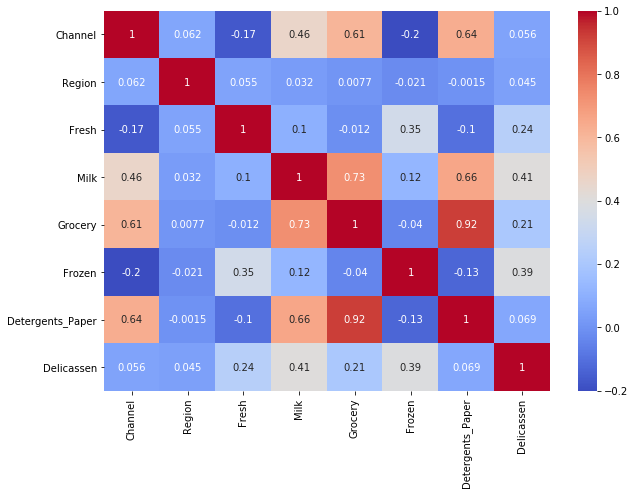

In [7]:
# correlation
plt.figure(figsize=(10,7))
snp.heatmap(wholesale_data.corr(), annot=True, cmap='coolwarm')

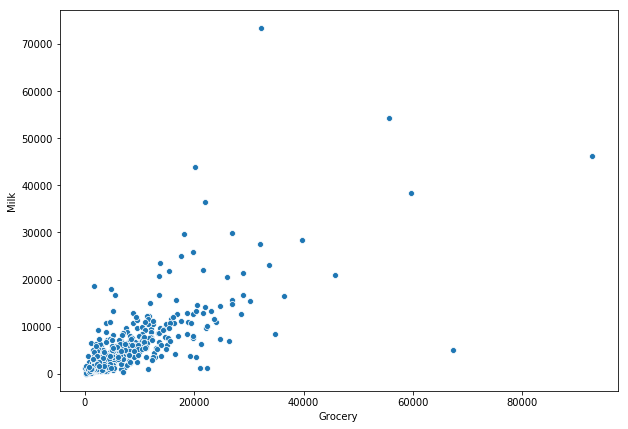

In [9]:
# graph showing relation between Milk and Grocery annual spending
plt.figure(figsize=(10,7))
snp.scatterplot(x='Grocery', y='Milk', data=wholesale_data)

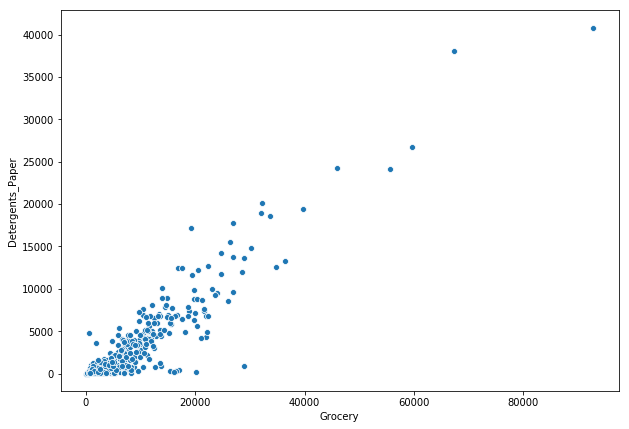

In [10]:
# graph showing relation between Detergents_Paper and Grocery annual spending
plt.figure(figsize=(10,7))
snp.scatterplot(y='Detergents_Paper', x='Grocery', data=wholesale_data)

In [11]:
# Feature Engineering (Add a new column Deli_Frozen that holds data of Frozen and Delicassen)
wholesale_data['Deli_Frozen'] = wholesale_data['Frozen'] + wholesale_data['Delicassen']

In [12]:
# Feature Engineering (Add a new column Milk_Gro that holds data of Grocery, Milk and Detergents_Paper )
wholesale_data['Milk_Gro'] = wholesale_data['Milk'] + wholesale_data['Grocery'] + wholesale_data['Detergents_Paper']

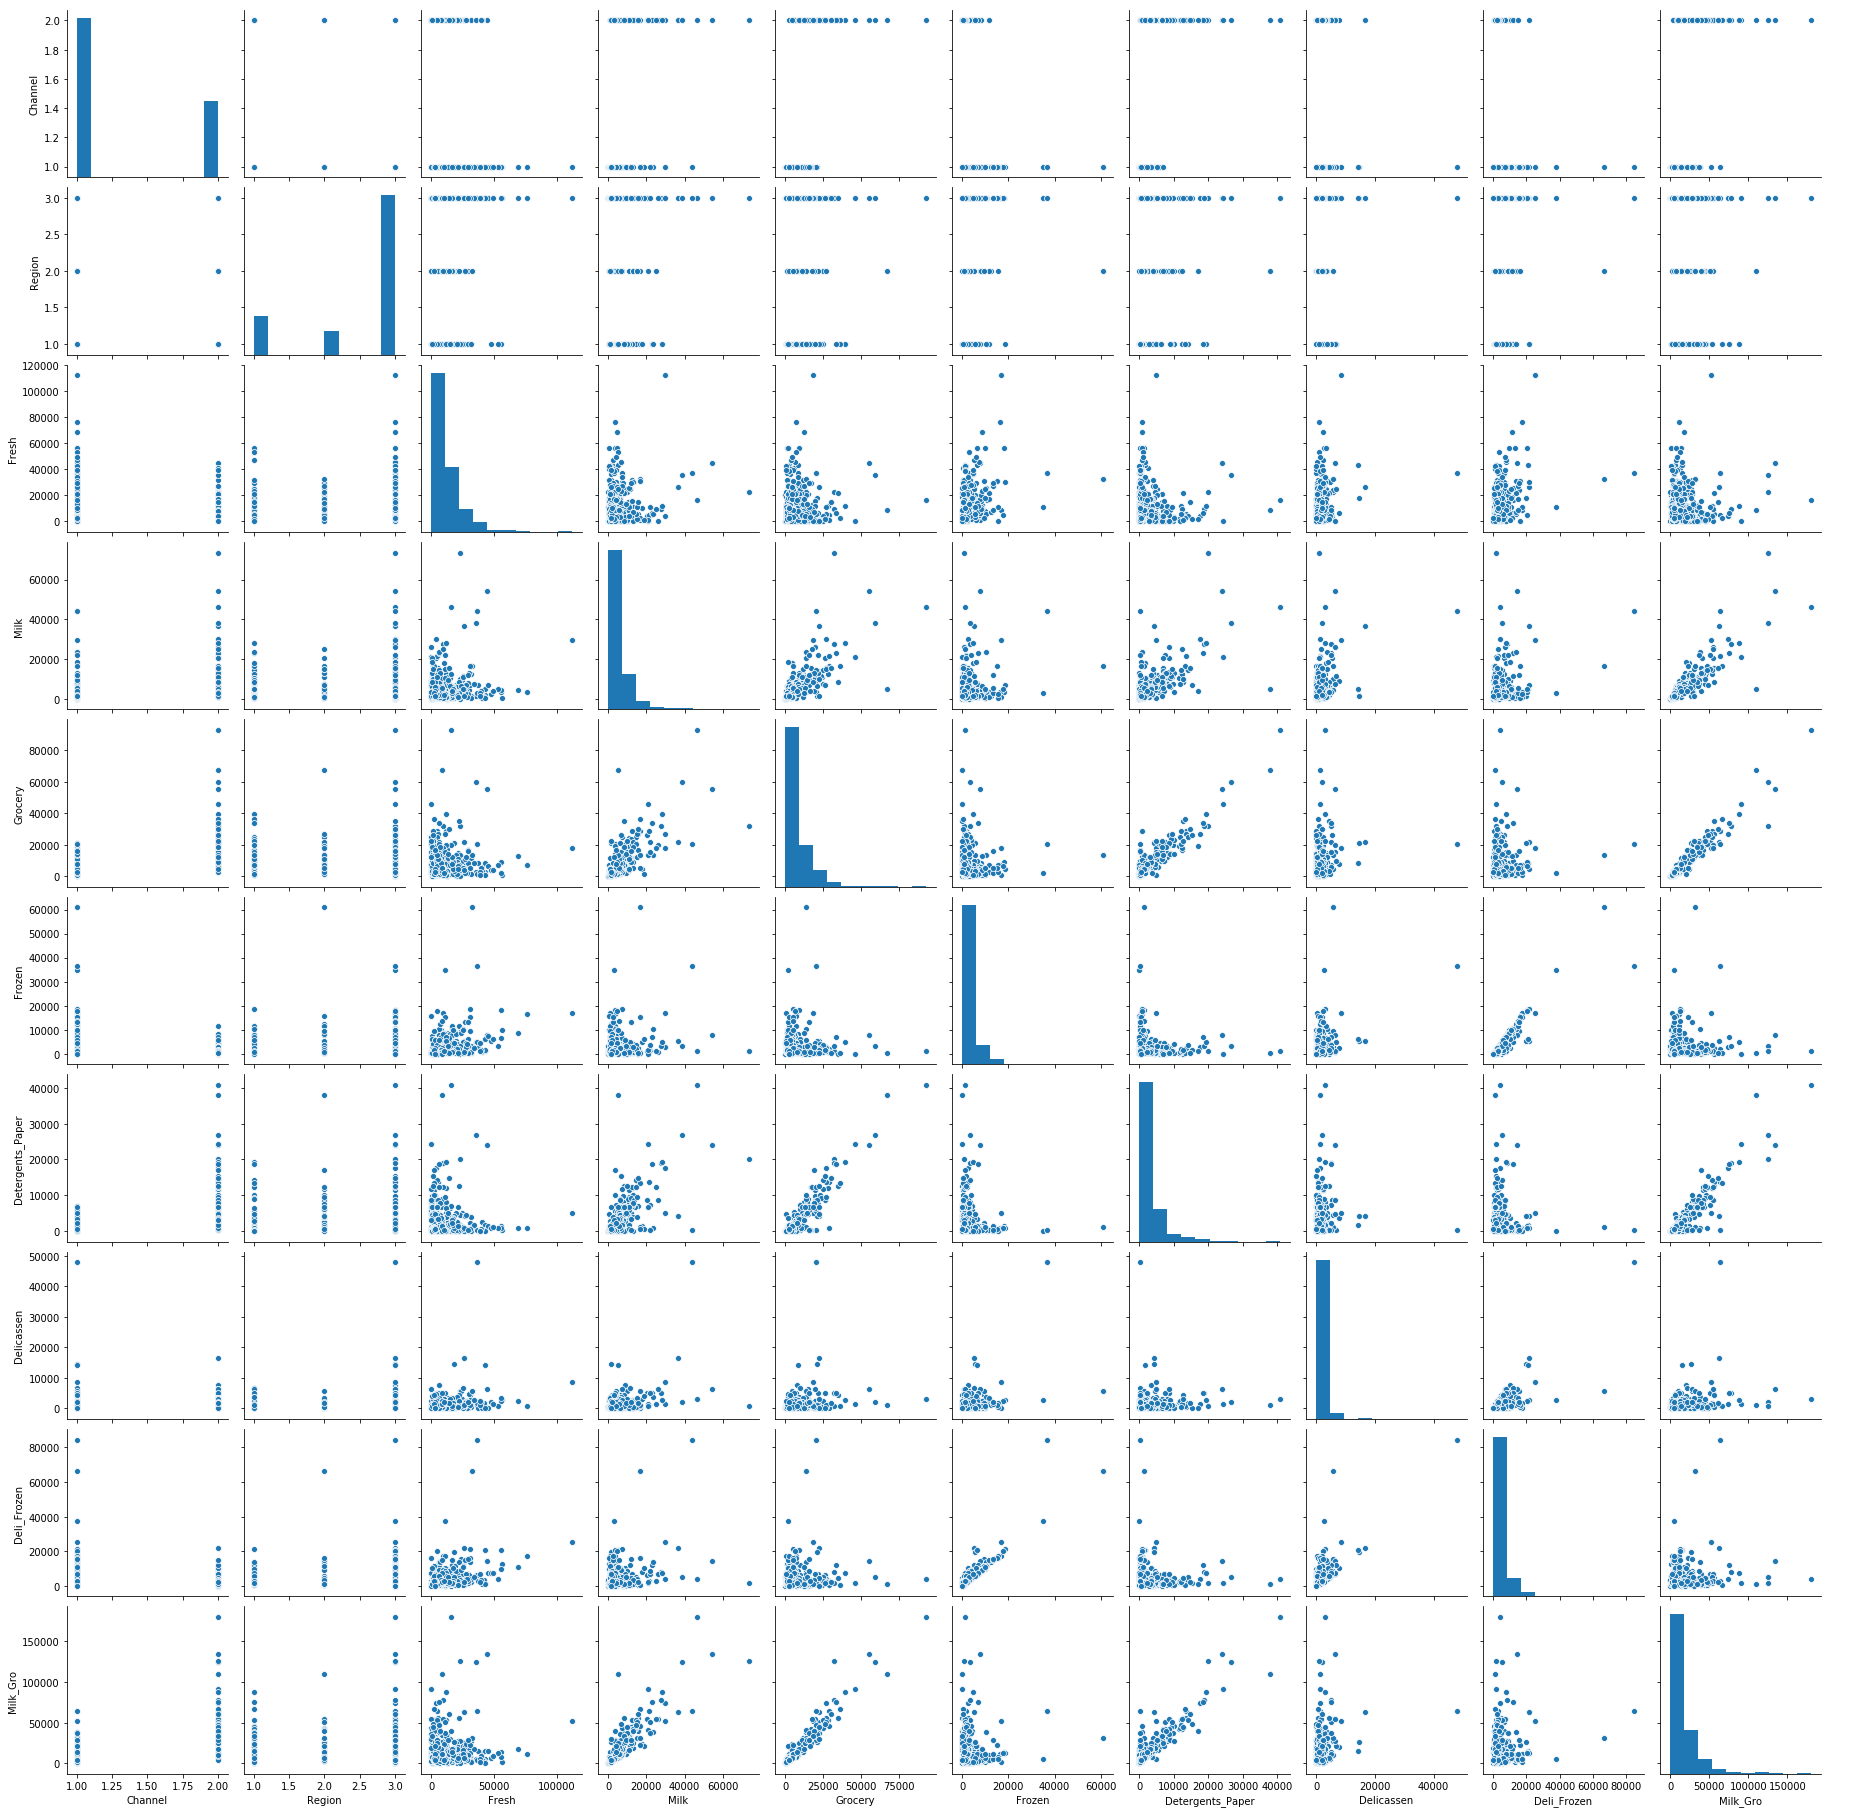

In [42]:
# pairplot
snp.pairplot(wholesale_data)

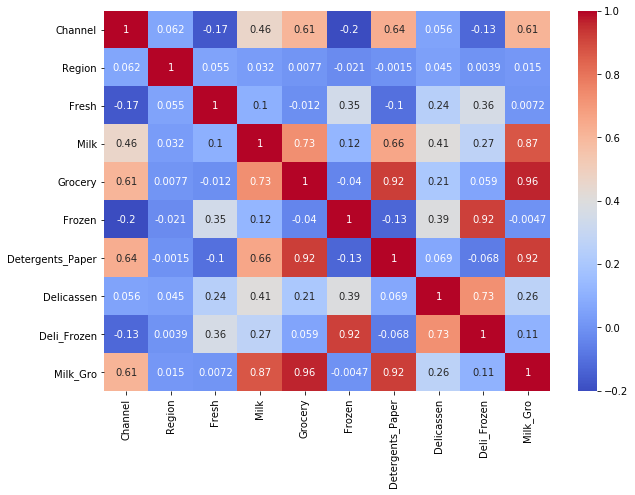

In [13]:
plt.figure(figsize=(10,7))
snp.heatmap(wholesale_data.corr(), annot=True, cmap='coolwarm')

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
model = RandomForestClassifier(n_estimators=100)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = wholesale_data.drop('Channel', axis=1)
y = wholesale_data['Channel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [19]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
predict = model.predict(X_test)

In [21]:
# Model Evaluation
print(' -- Classification Report --')
print(classification_report(y_test, predict))
print('\n -- Confusion Matrix --')
print(confusion_matrix(y_test, predict))

 -- Classification Report --
              precision    recall  f1-score   support

           1       0.98      0.93      0.95        94
           2       0.84      0.95      0.89        38

    accuracy                           0.93       132
   macro avg       0.91      0.94      0.92       132
weighted avg       0.94      0.93      0.93       132


 -- Confusion Matrix --
[[87  7]
 [ 2 36]]


In [32]:
# predictive analysis
test_data = wholesale_data.drop('Channel', axis=1).iloc[1]
model.predict(test_data.values.reshape(-1,9))[0]

2

In [33]:
# data from dataset
wholesale_data.iloc[1]['Channel']

2